# Applying labs to our dataset
## Lab 1

In [575]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Get the data: 

In [576]:
def load_data():
    path = 'data/StudentsPerformance.csv'
    return pd.read_csv(path)

data = load_data()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploratory Data Analysis

In [577]:
data.describe()  # analyses numeric columns

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

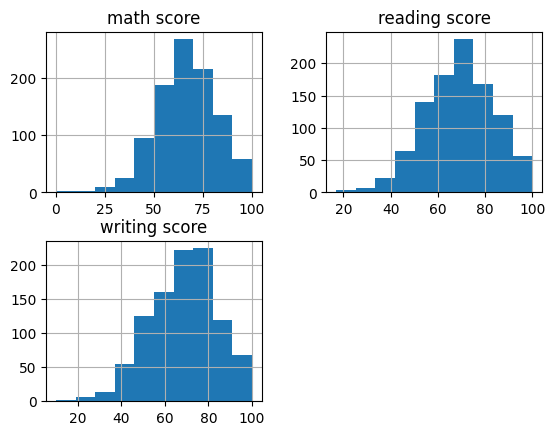

In [578]:
data.hist()

### Correlation between Scores
An overview of the correlation between
- reading and writing
- maths and writing
- maths and reading

<AxesSubplot:xlabel='math score', ylabel='reading score'>

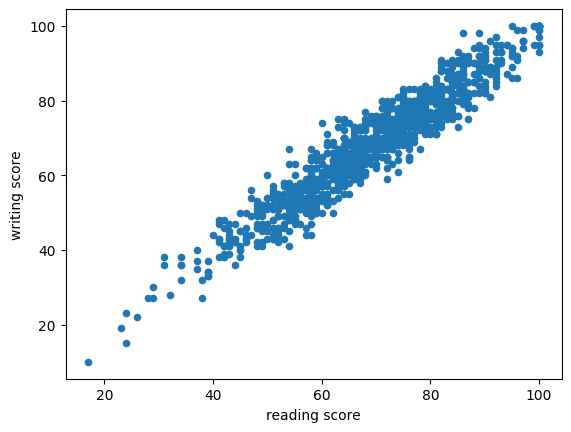

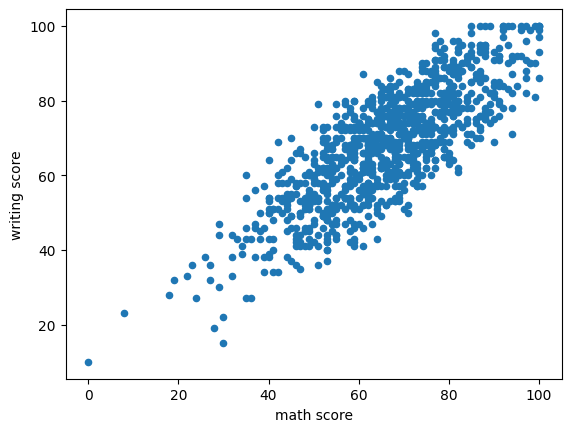

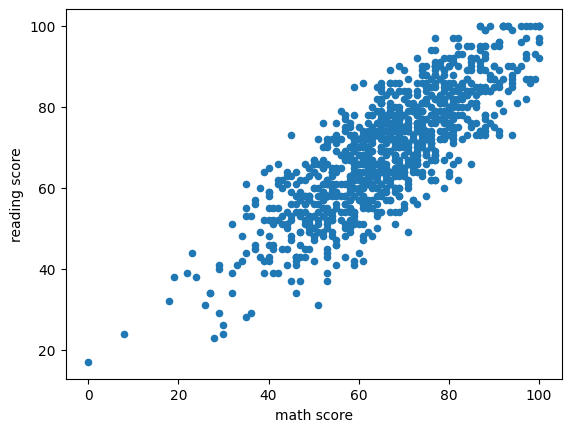

In [579]:
data.plot(x='reading score', y='writing score', kind='scatter')
data.plot(x='math score', y='writing score', kind='scatter')
data.plot(x='math score', y='reading score', kind='scatter')

## Lab 2
Getting started with sci-kit learn :). The first part of this lab is not applicable to our dataset. However, in machine-learning/p2.ipynb, I went through it all with the MNIST dataset. 

### Pre-processing of the data 
First, turn all the categorical data into numerical data. Then normalize it and sort it into train and test data. 

In [580]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Turning categorical data into numerical data. We need ordinal encoding for all categorical values with a natural ordering and one-hot encoding for all data without any natural ordering.  
1. **Ordinal encoding**: Just replace the category by an integer.  
2. **One-hot encoding**: To avoid creating an order between data values that don't have a natural order, add another binary column for each unique value in the column. 

In [581]:
# Keep hold of the original dataframe. 
df = data.copy()

# In our data, the ordinal columns would be: 'parental level of education'. 
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()  # TODO: 
df['parental level of education'] = ordinal_enc.fit_transform(df[['parental level of education']])

df.head()  # Data with numerical values for 'parental level of education'.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1.0,standard,none,72,72,74
1,female,group C,4.0,standard,completed,69,90,88
2,female,group B,3.0,standard,none,90,95,93
3,male,group A,0.0,free/reduced,none,47,57,44
4,male,group C,4.0,standard,none,76,78,75


In [582]:
# Now our leftover categorical values are all without any natural ordering. The following columns must be transformed: gender, ethnicity, lunch, test preparation course.
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(drop='if_binary', sparse=False)

# The following attributes are all binary attributes and since drop = 'if_binary', the encoder will drop the second column as it is redundant information.
binary_onehot = data[['gender', 'lunch', 'test preparation course']]
df[['gender', 'lunch', 'test preparation course']] = onehot_enc.fit_transform(binary_onehot)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,group B,1.0,1.0,1.0,72,72,74
1,0.0,group C,4.0,1.0,0.0,69,90,88
2,0.0,group B,3.0,1.0,1.0,90,95,93
3,1.0,group A,0.0,0.0,1.0,47,57,44
4,1.0,group C,4.0,1.0,1.0,76,78,75


In [583]:
# Now the only leftover categorical data is 'race/ethnicity'. Let's convert this as well. 
df[['ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E']] = onehot_enc.fit_transform(df[['race/ethnicity']])

df = df.drop(axis=1, columns=['race/ethnicity'])  # Drop the column containing categorical data.
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E
0,0.0,1.0,1.0,1.0,72,72,74,0.0,1.0,0.0,0.0,0.0
1,0.0,4.0,1.0,0.0,69,90,88,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,1.0,1.0,90,95,93,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,47,57,44,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,1.0,76,78,75,0.0,0.0,1.0,0.0,0.0


Now split the data into X (input) and y (target/outcome). In this case, I'm using the math score as y. 

In [584]:
X = df[['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E', 'reading score', 'writing score']]
y = df[['math score']]

X.head()  # Always good to check :) 

,gender,parental level of education,lunch,test preparation course,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E,reading score,writing score
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,72,74
1,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,90,88
2,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,95,93
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,57,44
4,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,78,75


In [585]:
y.head()  # Also check y.

,math score
0,72
1,69
2,90
3,47
4,76


After having X and y, we can scale the data and then split the data into a training and a test set. 

In [586]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

def scale_min_max(X, y): 
    scaler = MinMaxScaler()  # The skaler for the data.
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y)
    return X_scaled, y_scaled

In [587]:
# Split into train and test set. 
from sklearn.model_selection import train_test_split

X_scaled, y_scaled = scale_min_max(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

## Lab 3
1. Analyse most correlating features/attributes of the data set, generally and per class. 
2. Form 3 data sets, that contain progressively fewer features/attributes. 

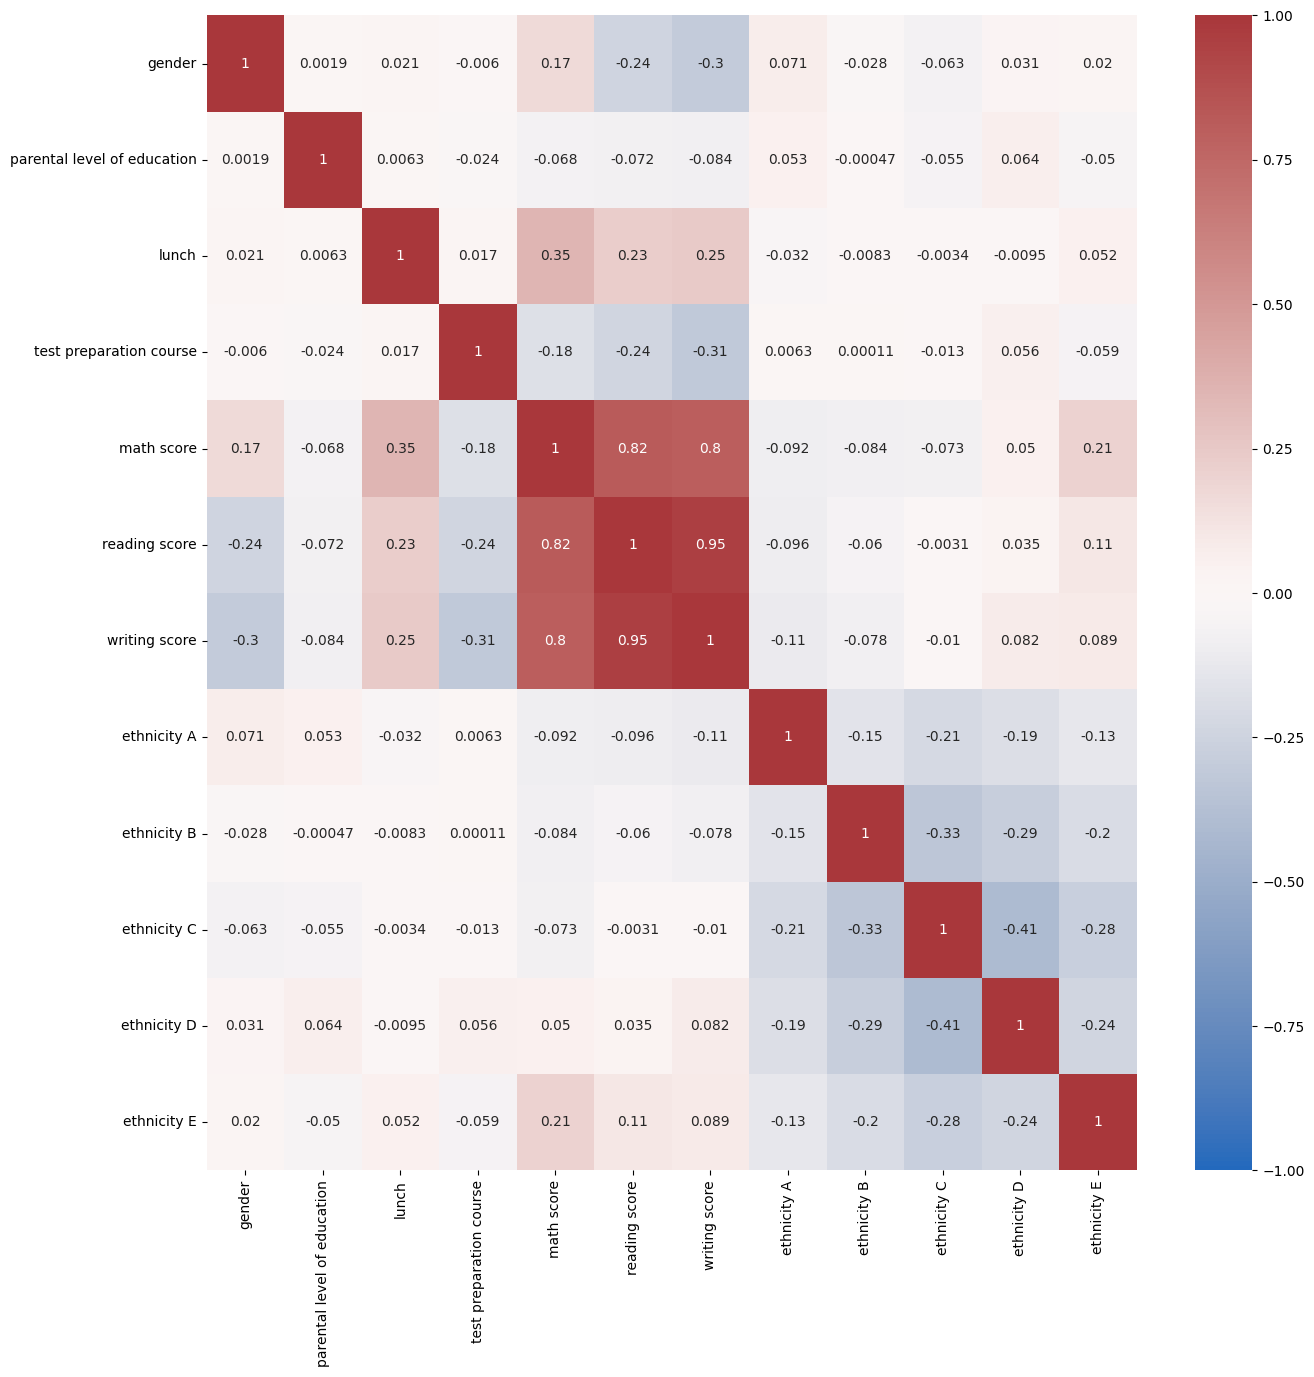

In [588]:
import seaborn as sns 

corr_matrix = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [589]:
# Correlation of all columns to the math score
corr_math = corr_matrix.iloc[4].map(lambda x: abs(x))
corr_math.sort_values(ascending=False)

math score                     1.000000
reading score                  0.817580
writing score                  0.802642
lunch                          0.350877
ethnicity E                    0.205855
test preparation course        0.177702
gender                         0.167982
ethnicity A                    0.091977
ethnicity B                    0.084250
ethnicity C                    0.073387
parental level of education    0.068279
ethnicity D                    0.050071
Name: math score, dtype: float64

In [590]:
corr_reading = corr_matrix.iloc[5].map(lambda x: abs(x))
corr_reading.sort_values(ascending=False)

reading score                  1.000000
writing score                  0.954598
math score                     0.817580
gender                         0.244313
test preparation course        0.241780
lunch                          0.229560
ethnicity E                    0.106712
ethnicity A                    0.096274
parental level of education    0.072444
ethnicity B                    0.060283
ethnicity D                    0.035177
ethnicity C                    0.003074
Name: reading score, dtype: float64

In [591]:
corr_gender = corr_matrix.iloc[0].map(lambda x: abs(x))  # Correlation for gender. 
corr_gender.sort_values(ascending=False)

gender                         1.000000
writing score                  0.301225
reading score                  0.244313
math score                     0.167982
ethnicity A                    0.071001
ethnicity C                    0.063368
ethnicity D                    0.030566
ethnicity B                    0.028466
lunch                          0.021372
ethnicity E                    0.020302
test preparation course        0.006028
parental level of education    0.001913
Name: gender, dtype: float64

In [592]:
corr_ethnicity_a = corr_matrix.iloc[7].map(lambda x: abs(x))  # Correlation for lunch.
corr_ethnicity_a.sort_values(ascending=False)

ethnicity A                    1.000000
ethnicity C                    0.213923
ethnicity D                    0.186234
ethnicity B                    0.151381
ethnicity E                    0.126110
writing score                  0.110714
reading score                  0.096274
math score                     0.091977
gender                         0.071001
parental level of education    0.053288
lunch                          0.032329
test preparation course        0.006315
Name: ethnicity A, dtype: float64

Split into three datasets containing a different amount of top-correlating features (1, 2, 3) for each class (in total: 3, 6, 9 features). The three classes I've chosen for practice here are `math score`, `gender` and `ethnicity A`. This doesn't necessarily make sense in the real world.

In [593]:
# Top correlating for
## Math score:  writing score,  math score,     gender
## Gender:      writing score,  reading score,  math score
## Ethnicity A: ethnicity C,    ethnicity D,    ethnicity B

data_two_features = df[['writing score', 'ethnicity C']]
data_five_features = df[
    ['writing score', 'math score', 'reading score', 'ethnicity C', 'ethnicity D']
]
data_seven_features = df[[
    'writing score', 
    'math score', 
    'reading score', 
    'ethnicity C', 
    'ethnicity D', 
    'gender', 
    'ethnicity B'
]]
data_seven_features.head()

,writing score,math score,reading score,ethnicity C,ethnicity D,gender,ethnicity B
0,74,72,72,0.0,0.0,0.0,1.0
1,88,69,90,1.0,0.0,0.0,0.0
2,93,90,95,0.0,0.0,0.0,1.0
3,44,47,57,0.0,0.0,1.0,0.0
4,75,76,78,1.0,0.0,1.0,0.0


Task: Run a classifier of your choice on the original and smaller data sets, and record their accuracy on these datasets.  
First, the **Original Dataset**:

In [594]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [595]:
# Check the accuracy of the LinearRegression model.
accuracy_data = pd.DataFrame(lr.predict(X_train))
accuracy_data['target'] = y_train

lr.score(X_test, y_test)

0.8681729491279807

Now the **Smaller Datasets**:

In [596]:
X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(
    data_two_features, df[['math score']]
)
X_five_train, X_five_test, y_five_train, y_five_test = train_test_split(
    data_five_features, df[['gender']]
)
X_seven_train, X_seven_test, y_seven_train, y_seven_test = train_test_split(
    data_seven_features, df[['ethnicity A']]
)

In [597]:
# 2 features. 
lr_two = LinearRegression() 
lr_two.fit(X_two_train, y_two_train)

# lr_two.score(X_two_test, y_two_test)

acc_two = pd.DataFrame(
    {'Actual': y_two_test.squeeze(), 'Predicted:': lr_two.predict(X_two_test).squeeze()}
)
lr_two.score(X_two_test, y_two_test)

0.657044888267873

In [598]:
# 5 features predicting the gender. 
from sklearn.linear_model import SGDClassifier
clf_five = SGDClassifier(max_iter=1000, random_state=42) 
clf_five.fit(X_five_train, y_five_train)

# lr_two.score(X_two_test, y_two_test)

acc_five = pd.DataFrame(
    {'Actual': y_five_test.squeeze(), 'Predicted:': clf_five.predict(X_five_test).squeeze()}
)

from sklearn.model_selection import cross_val_score
cross_val_score(clf_five, X_five_train, y_five_train, cv=3, scoring='accuracy')

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

array([0.884, 0.8  , 0.868])

## Lab 4
Do classifier testing and evaluation. Run any classifier model of your choice on your data set and record the major metrics: 
- accuracy, 
- TP rate (true-positive)
- FP rate (false-positive)
- precision
- recall
- F-measure
- ROC area
Then plot your confusion matrix and make comparisons between different evaluation metrics. Which ones seem more suitable for your data set?  

In [599]:
# 'lr' is my Linear Regression model for all data trying to predict the math score. 
# Here, I should work with trying to predict the gender, as this is classification and predicting the math score isn't. 
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E
0,0.0,1.0,1.0,1.0,72,72,74,0.0,1.0,0.0,0.0,0.0
1,0.0,4.0,1.0,0.0,69,90,88,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,1.0,1.0,90,95,93,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,47,57,44,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,1.0,76,78,75,0.0,0.0,1.0,0.0,0.0


In [600]:
X_scaled, y_scaled = scale_min_max(df.drop('gender', axis=1), df[['gender']])
X_scaled.shape

(1000, 11)

Now let's run the Stochastic Gradient Descent Classifier on it. 

In [601]:
X_train

array([[1.        , 0.        , 1.        , ..., 0.        , 0.42168675,
        0.36666667],
       [1.        , 0.        , 1.        , ..., 0.        , 0.44578313,
        0.51111111],
       [1.        , 0.8       , 1.        , ..., 0.        , 0.31325301,
        0.36666667],
       ...,
       [0.        , 0.8       , 1.        , ..., 0.        , 0.55421687,
        0.63333333],
       [0.        , 1.        , 0.        , ..., 0.        , 0.5060241 ,
        0.44444444],
       [1.        , 0.4       , 0.        , ..., 0.        , 0.60240964,
        0.61111111]])

In [602]:
from sklearn.linear_model import SGDClassifier

gender_sgd_clf = SGDClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)
gender_sgd_clf.fit(X_train, y_train)

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)

In [603]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

y_true = y_test
y_pred = gender_sgd_clf.predict(X_test)

Get the accuracy, TP rate, FP rate, precision, recall, F measure and the ROC area. 

In [604]:
def getMetrics(y_true, y_pred):
    # Keeping track of all the metrics. 
    metrics = {}

    # For the accuracy. 
    from sklearn.metrics import accuracy_score
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['accuracy']
    
    # Confusion Matrix. 
    from sklearn.metrics import confusion_matrix
    con_matrix = confusion_matrix(y_true, y_pred)
    
    # True Positive, False Positive, True Negative, False Negative
    metrics['TP'] = con_matrix[0][0]
    metrics['FP'] = con_matrix[0][1]
    metrics['TN'] = con_matrix[1][1]
    metrics['FN'] = con_matrix[1][0]
    
    # Sensitivity & Specificity
    metrics['sensitivity'] = metrics['TP'] / (metrics['TP'] + metrics['FN'])
    metrics['specificity'] = metrics['TN'] / (metrics['TN'] + metrics['FP'])

    # For recall & precision. 
    from sklearn.metrics import precision_score, recall_score

    metrics['precision'] = precision_score(y_true, y_pred)
    metrics['recall'] = recall_score(y_true, y_pred)

    # F-measure. 
    from sklearn.metrics import f1_score

    metrics['f1-score'] = f1_score(y_true, y_pred)

    # ROC area. 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    metrics['roc-area'] = roc_auc_score(y_true, y_pred)

    import matplotlib.pyplot as plt
    fpr, tpr, _ = roc_curve(y_true, y_pred)

    #create ROC curve
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print(pd.DataFrame([metrics]))
    
    return metrics

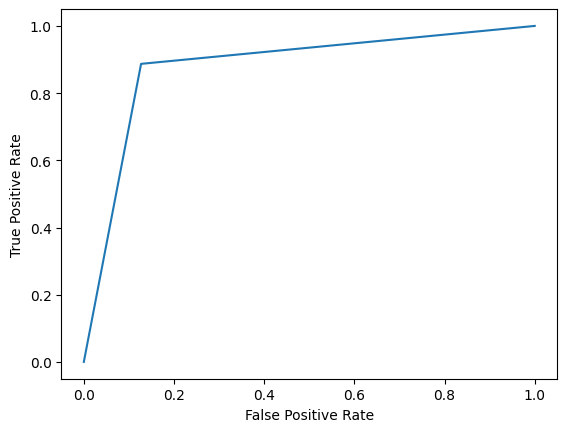

   accuracy   TP  FP   TN  FN  sensitivity  specificity  precision    recall  \
0      0.88  110  16  110  14     0.887097     0.873016   0.873016  0.887097   

   f1-score  roc-area  
0      0.88  0.880056  


In [605]:
gender_metrics = getMetrics(y_true, y_pred)

In [606]:
precision_recall_fscore_support(y_true, y_pred, average='macro')
# precision_recall_fscore_support(y_true, y_pred, average='micro')
# precision_recall_fscore_support(y_true, y_pred, average='weighted')  # The support is the number of occurrences of each class in y_true.

(0.8800563236047108, 0.8800563236047108, 0.88, None)

<AxesSubplot:>

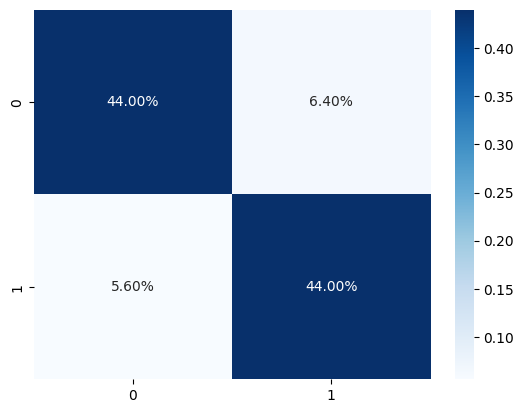

In [607]:
from sklearn.metrics import confusion_matrix

gender_confusion_matrix = confusion_matrix(y_true, y_pred)

# For plotting the matrix.
sns.heatmap(gender_confusion_matrix / np.sum(gender_confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

## Lab 5
1. Read the Scikit-Learn library documentation that covers Bayes [nets](https://scikit-learn.org/stable/modules/naive_bayes.html#).
2. Run the *Multinomial Naive Bayes* on your data in your portfolio.

#### Naive Bayes (Scikit Learn)
Different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$. Despite their over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations (document classification & spam filtering). They require a small amount of training data to estimate the necessary parameters. They can be extremely fast. 

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


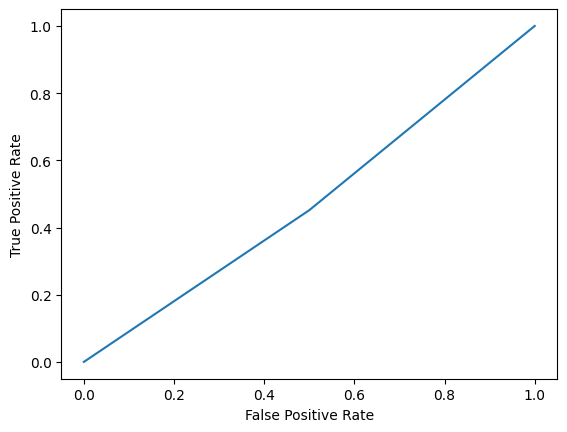

   accuracy  TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0     0.476  63  63  56  68     0.480916     0.470588   0.470588  0.451613   

   f1-score  roc-area  
0  0.460905  0.475806  


In [608]:
from sklearn.naive_bayes import MultinomialNB

# Create, fit, and predict a Multinomial model using the data set
multi_nom = MultinomialNB(alpha=1.0, fit_prior=False)
multi_nom.fit(X_train, y_train)
multi_nom_y_pred = multi_nom.predict(X_test)

# Get relevant metrics
multi_nom_metrics = getMetrics(y_test, multi_nom_y_pred)

#### Gaussian Naive Bayes
The likelihood of the features is assumed to be Gaussian: $P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

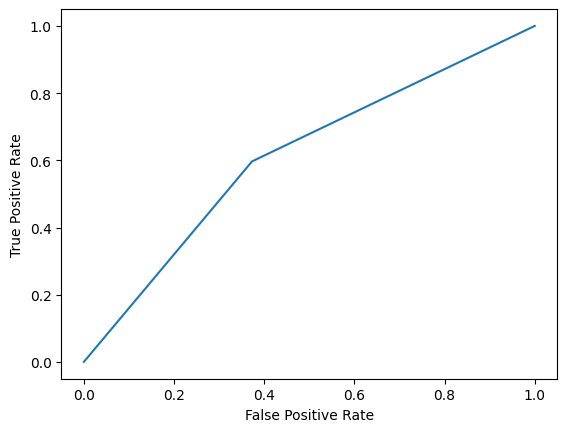

   accuracy  TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0     0.612  79  47  74  50     0.612403      0.61157    0.61157  0.596774   

   f1-score  roc-area  
0  0.604082  0.611879  


In [609]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_y_pred = gnb.fit(X_train, y_train.ravel()).predict(X_test)
gnb_metrics = getMetrics(y_true, gnb_y_pred)

#### Complement Naive Bayes
CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularaly suited for imbalanced datsets. CNB uses statistics from the complement of each class to compute the model's weights. 

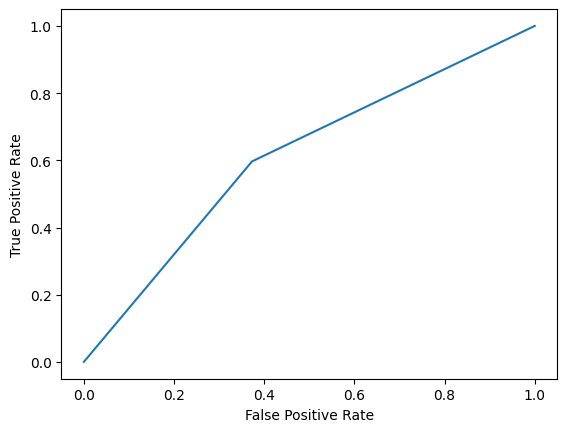

   accuracy  TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0     0.612  79  47  74  50     0.612403      0.61157    0.61157  0.596774   

   f1-score  roc-area  
0  0.604082  0.611879  


In [610]:
from sklearn.naive_bayes import ComplementNB

cnb = GaussianNB()
cnb_y_pred = gnb.fit(X_train, y_train.ravel()).predict(X_test)
cnb_metrics = getMetrics(y_true, gnb_y_pred)

#### Bernoulli Naive Bayes
This implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions -> there may be multiple freatures but each one is assumed to be a binary-valued variable. Therefore this class requires samples to be represented as binaryvalued feature vectors. 

In [611]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.2,1.0,1.0,0.86,0.795181,0.844444,0.0,0.0,1.0,0.0,0.0
1,0.2,1.0,1.0,1.00,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.52,0.590361,0.700000,0.0,1.0,0.0,0.0,0.0
3,0.4,1.0,1.0,0.63,0.626506,0.711111,0.0,0.0,1.0,0.0,0.0
4,0.4,0.0,1.0,0.64,0.674699,0.677778,0.0,1.0,0.0,0.0,0.0


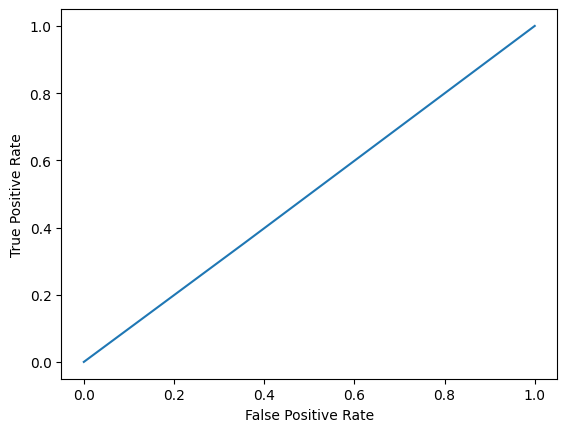

   accuracy  TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0       0.5  81  45  44  80     0.503106     0.494382   0.494382  0.354839   

   f1-score  roc-area  
0  0.413146  0.498848  


In [612]:
# Get only binary data ['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicities']
# X_binary = X.drop(['reading score', 'writing score'], axis=1)

# X_binary_scaled, y_binary_scaled = scale_min_max(X, y)
# X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_scaled, y_scaled)

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb_y_pred = bnb.fit(X_train, y_train.ravel()).predict(X_test)
bnb_metrics = getMetrics(y_true, bnb_y_pred)

In [613]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.2,1.0,1.0,0.86,0.795181,0.844444,0.0,0.0,1.0,0.0,0.0
1,0.2,1.0,1.0,1.00,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.52,0.590361,0.700000,0.0,1.0,0.0,0.0,0.0
3,0.4,1.0,1.0,0.63,0.626506,0.711111,0.0,0.0,1.0,0.0,0.0
4,0.4,0.0,1.0,0.64,0.674699,0.677778,0.0,1.0,0.0,0.0,0.0


#### Categorical Naive Bayes
Implements the categorical naive Bayes algorithm for categorically distributed data. It assumes that each feature has its own categorical distribution. For each feature i in training set X, CNB estimates a categorical distribution for each feature i of X condititioned on the class y.

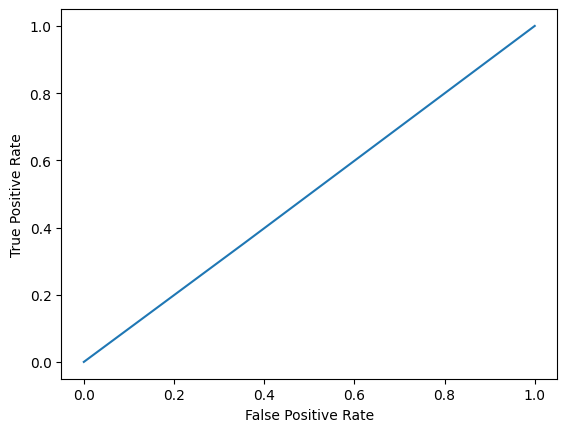

   accuracy  TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0       0.5  81  45  44  80     0.503106     0.494382   0.494382  0.354839   

   f1-score  roc-area  
0  0.413146  0.498848  


In [614]:
from sklearn.naive_bayes import CategoricalNB
catnb = CategoricalNB()
catnb_y_pred = catnb.fit(X_train, y_train.ravel()).predict(X_test)
catnb_metrics = getMetrics(y_true, bnb_y_pred)

In [615]:
# DataFrame containing metrics from different models:
## Stochastic Gradient Descent Classifier
## Multinomial Naive Bayes
## Gaussian Naive Bayes
## Complement Naive Bayes
## Bernoulli Bayes
## Categorical Bayes
metrics_comparison = pd.DataFrame(
    [gender_metrics, multi_nom_metrics, gnb_metrics, cnb_metrics, bnb_metrics, catnb_metrics],
)
metrics_comparison

,accuracy,TP,FP,TN,FN,sensitivity,specificity,precision,recall,f1-score,roc-area
0,0.880,110,16,110,14,0.887097,0.873016,0.873016,0.887097,0.880000,0.880056
1,0.476,63,63,56,68,0.480916,0.470588,0.470588,0.451613,0.460905,0.475806
2,0.612,79,47,74,50,0.612403,0.611570,0.611570,0.596774,0.604082,0.611879
3,0.612,79,47,74,50,0.612403,0.611570,0.611570,0.596774,0.604082,0.611879
4,0.500,81,45,44,80,0.503106,0.494382,0.494382,0.354839,0.413146,0.498848
5,0.500,81,45,44,80,0.503106,0.494382,0.494382,0.354839,0.413146,0.498848


#### Complex Bayesian Networks

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD

student = BayesianNetwork([('diff', 'grades'), ('intel', 'grades')])